<a href="https://colab.research.google.com/github/gulabpatel/Anomaly_Detection_Python/blob/main/Part%2011%3A%20Robust_Covariance_Estimation_and_Mahalanobis_Distances_relevance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate data


First, we generate a dataset of 125 samples and 2 features. Both features are Gaussian distributed with mean of 0 but feature 1 has a standard deviation equal to 2 and feature 2 has a standard deviation equal to 1. Next, 25 samples are replaced with Gaussian outlier samples where feature 1 has a standard devation equal to 1 and feature 2 has a standard deviation equal to 7.


For the sklearn documentation click [here](https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html#sphx-glr-auto-examples-covariance-plot-mahalanobis-distances-py)

In [1]:
import numpy as np

# for consistent results
np.random.seed(7)

n_samples = 125
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
print('gen_cov ', gen_cov)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
print('X : ', X)
# add some outliers
outliers_cov = np.eye(n_features)
print('outliers_cov : ', outliers_cov)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7
print('outliers_cov : ', outliers_cov)
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)
print('X : ', X)

gen_cov  [[1. 0.]
 [0. 1.]]
X :  [[ 3.38105141e+00 -4.65937371e-01]
 [ 6.56403274e-02  4.07516283e-01]
 [-1.57784606e+00  2.06557291e-03]
 [-1.78077172e-03 -1.75472431e+00]
 [ 2.03531601e+00  6.00498516e-01]
 [-1.25085795e+00 -1.71548261e-01]
 [ 1.01059875e+00 -2.61356415e-01]
 [-4.85498157e-01 -1.45324141e+00]
 [ 1.10916062e+00  1.23880905e-01]
 [ 5.48919848e-01 -1.52652453e+00]
 [ 3.30139938e+00  1.54335535e-01]
 [-7.74279887e-01  2.02907222e+00]
 [-9.07720597e-02 -1.45067870e+00]
 [-8.10455711e-01 -2.28831510e+00]
 [ 2.09879310e+00 -4.16474319e-01]
 [-1.48510705e+00  1.07247013e+00]
 [-3.30215118e+00  5.35429356e-01]
 [-4.12882961e+00 -6.62159340e-01]
 [-2.40843969e+00  1.46197563e+00]
 [ 3.53232176e+00 -3.29413752e-01]
 [ 1.68146648e+00 -1.79986401e-01]
 [ 1.13612377e+00 -7.52837196e-01]
 [-3.41667841e+00 -1.80309866e+00]
 [ 7.66243704e-01  2.24759505e+00]
 [ 5.38823261e-01 -5.24604619e-01]
 [ 3.82403772e+00  2.37301847e-01]
 [ 2.02867970e-01  2.52577736e-01]
 [-2.64754395e-01 -3.0

#Comparison of results


Below, we fit MCD and MLE based covariance estimators to our data and print the estimated covariance matrices. Note that the estimated variance of feature 2 is much higher with the MLE based estimator (7.5) than that of the MCD robust estimator (1.2). This shows that the MCD based robust estimator is much more resistant to the outlier samples, which were designed to have a much larger variance in feature 2.

In [2]:
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[ 3.26253567e+00 -3.06695631e-03]
 [-3.06695631e-03  1.22747343e+00]]
MLE:
[[ 3.23773583 -0.24640578]
 [-0.24640578  7.51963999]]


To better visualize the difference, we plot contours of the Mahalanobis distances calculated by both methods. Notice that the robust MCD based Mahalanobis distances fit the inlier black points much better, whereas the MLE based distances are more influenced by the outlier red points.

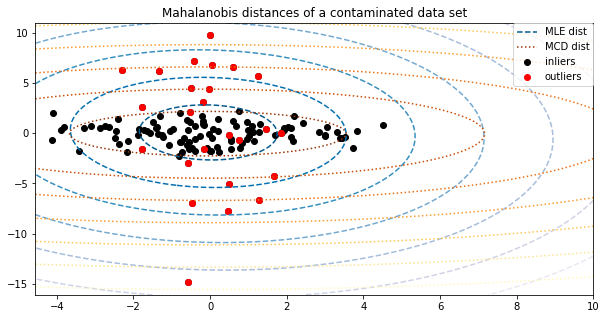

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot data set
inlier_plot = ax.scatter(X[:, 0], X[:, 1],
                         color='black', label='inliers')
outlier_plot = ax.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                          color='red', label='outliers')
ax.set_xlim(ax.get_xlim()[0], 10.)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]
# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(xx, yy, np.sqrt(mahal_emp_cov),
                              cmap=plt.cm.PuBu_r, linestyles='dashed')
# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(xx, yy, np.sqrt(mahal_robust_cov),
                            cmap=plt.cm.YlOrBr_r, linestyles='dotted')

# Add legend
ax.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
          inlier_plot, outlier_plot],
          ['MLE dist', 'MCD dist', 'inliers', 'outliers'],
          loc="upper right", borderaxespad=0)

plt.show()

Finally, we highlight the ability of MCD based Mahalanobis distances to distinguish outliers. We take the cubic root of the Mahalanobis distances, yielding approximately normal distributions (as suggested by Wilson and Hilferty 2), then plot the values of inlier and outlier samples with boxplots. The distribution of outlier samples is more separated from the distribution of inlier samples for robust MCD based Mahalanobis distances.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 864x720 with 0 Axes>

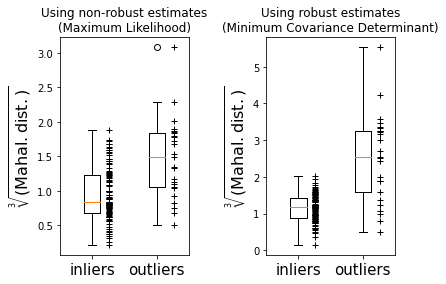

In [5]:
plt.figure(figsize=(12,10))
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.6)

# Calculate cubic root of MLE Mahalanobis distances for samples
emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
# Plot boxplots
ax1.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
# Plot individual samples
ax1.plot(np.full(n_samples - n_outliers, 1.26), emp_mahal[:-n_outliers],
         '+k', markeredgewidth=1)
ax1.plot(np.full(n_outliers, 2.26), emp_mahal[-n_outliers:],
         '+k', markeredgewidth=1)
ax1.axes.set_xticklabels(('inliers', 'outliers'), size=15)
ax1.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
ax1.set_title("Using non-robust estimates\n(Maximum Likelihood)")

# Calculate cubic root of MCD Mahalanobis distances for samples
robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
# Plot boxplots
ax2.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
            widths=.25)
# Plot individual samples
ax2.plot(np.full(n_samples - n_outliers, 1.26), robust_mahal[:-n_outliers],
         '+k', markeredgewidth=1)
ax2.plot(np.full(n_outliers, 2.26), robust_mahal[-n_outliers:],
         '+k', markeredgewidth=1)
ax2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
ax2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
ax2.set_title("Using robust estimates\n(Minimum Covariance Determinant)")

plt.show()